In [81]:
from minisom import MiniSom

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

import math
import numpy as np

import matplotlib.pyplot as plt

In [82]:
iris = load_iris()
features = iris.data
labels = iris.target

print(features)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Normalizing to [0, 1]

In [83]:
sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

In [84]:
map_size = 5 * math.sqrt(len(features))
map_height = map_width = math.ceil(math.sqrt(map_size))

print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {features.shape[1]}')

(map_height, map_width) = (8, 8)
Number of features: 4


In [85]:
som = MiniSom(x=map_height, y=map_width, input_len=features.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
 
som.pca_weights_init(features)
som.train(features, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06627848868800729


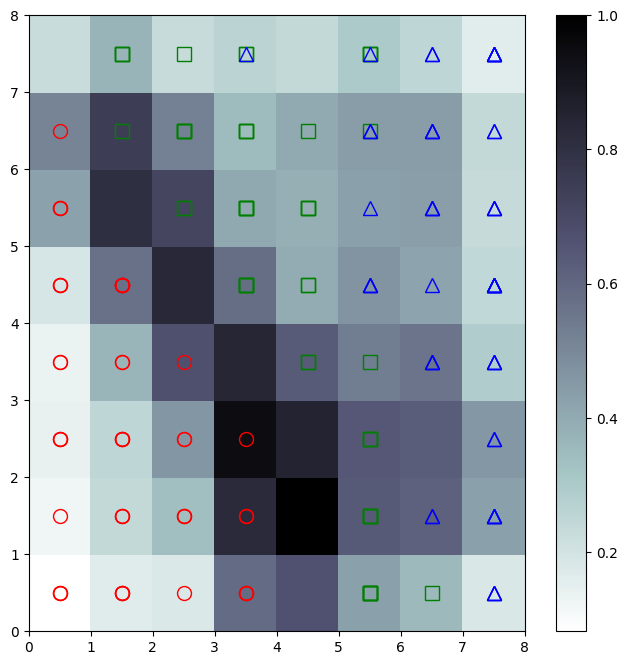

In [89]:
plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# plot markers
markers = ['o', 's', '^']
colors = ['r', 'g', 'b']
for i, feature in enumerate(features):
    w = som.winner(feature)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
        markers[labels[i]], markeredgecolor = colors[labels[i]], 
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)

plt.show()

## Samples Distribution

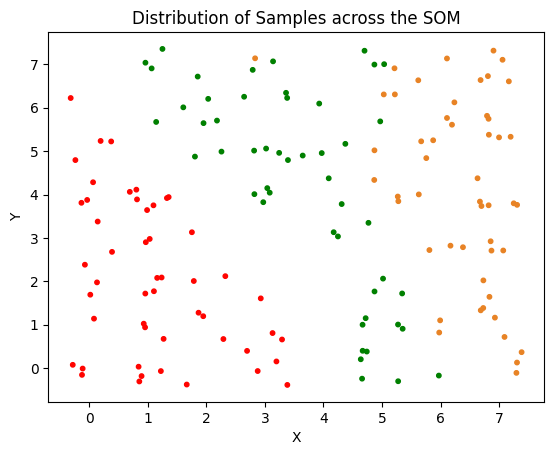

In [87]:
# Get the winning neuron for each sample
winning_neurons = np.array([som.winner(x) for x in features])

# Add a random offset to avoid overlaps between points within the same cell
offset = np.random.uniform(low=-0.4, high=0.4, size=(len(features), 2))
winning_neurons = winning_neurons + offset

# Define the colors based on the labels
colors = ['#ff0400', 'g', '#e88325']
label_colors = [colors[label] for label in labels]

# Create the scatter plot
plt.scatter(winning_neurons[:,0], winning_neurons[:,1], s=10, c=label_colors)
plt.title('Distribution of Samples across the SOM')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Most activated neurons

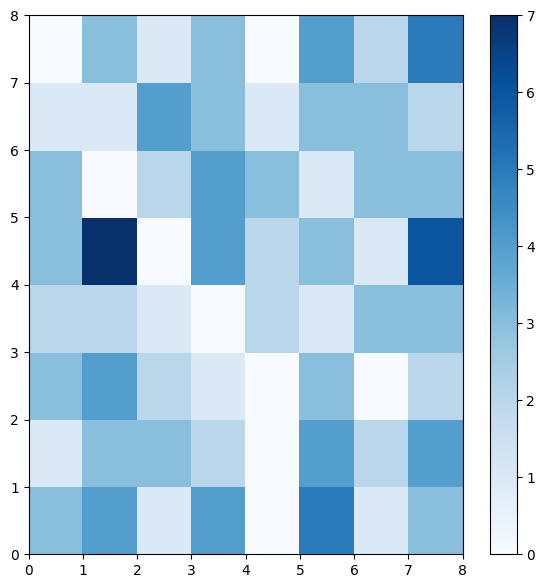

In [88]:
plt.figure(figsize=(7, 7))

frequencies = som.activation_response(features)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()